# Import libraries
Here we import all libraries or modules of these libraries required in the projectHere we import all libraries or modules of these libraries required in the project

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from datetime import date
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as mcmt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import numpy as np

# See data
Here we analyze data to decide what charts can be displayed later

In [2]:
df = pd.read_csv('data/bfro_reports_geocoded.csv')
df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data pre-processing
Here we process the data to further plot the correct charts 

In [3]:
date_df = df[['date']].copy()
date_df.dropna(inplace=True)
date_df['Year'] = pd.to_datetime(date_df['date'],
  format='%Y-%m-%d').dt.year
date_df['Month'] = pd.to_datetime(date_df['date'],
  format='%Y-%m-%d').dt.month
date_df['Day'] = pd.to_datetime(date_df['date'],
  format='%Y-%m-%d').dt.day

this_year = date.today().year
date_df = date_df[date_df['Year'] < this_year]
date_df = date_df[date_df['Year'] > 1957]

month_dict = {
  1: 'January',
  2: 'February',
  3: 'March',
  4: 'April',
  5: 'May',
  6: 'June', 
  7: 'July',
  8: 'August',
  9: 'September',
  10: 'October',
  11: 'November',
  12: 'December'
}
date_df['Month'] = date_df['Month'].map(month_dict)

In [4]:
def FtoC(df, col):
  df[col] = (df[col] - 32) * 5/9
  return df

df = FtoC(df, 'temperature_high')
df = FtoC(df, 'temperature_mid')
df = FtoC(df, 'temperature_low')

# Plots

In [5]:
font_prop = fm.FontProperties(fname='./FugazOne-Regular.ttf', size=12)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
text_color = "#4e5f92"
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.monospace'] = 'Nimbus Sans'
plt.rcParams["font.weight"] = "bold"
plt.rcParams['text.color'] = text_color
plt.rcParams['axes.titlecolor'] = text_color
plt.rcParams['axes.labelcolor'] = text_color
plt.rcParams['axes.edgecolor'] = text_color
plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color

In [6]:

def get_boxplot(df, col, title):
  if(is_numeric_dtype(df[col])):
    fig = plt.figure(figsize=(5, 5))
    fig.set_facecolor('#e6edff')
    plt.gca().set_facecolor('#e6edff')
    cmap = mcm.get_cmap('viridis')
    
    colors = cmap(np.linspace(0.2, 1, 3))   

    this_df = df[col]
    this_df.dropna(inplace=True)
    sns.boxplot(
      y=this_df.to_numpy(),
      showmeans=True,
      width=0.4,
      meanline=True,
      meanprops={'color': '#7ecfcd', 'ls': '-', 'lw': 2},
      medianprops={'color': '#2a3359', 'ls': '-', 'lw': 2},
      palette=colors
    )
    
    mean_patch = mpatches.Patch(color='#7ecfcd', label='Mean')
    median_patch = mpatches.Patch(color='#2a3359', label='Median')

    plt.title(f"{title} Boxplot", fontproperties=font_prop)
    plt.legend(handles=[mean_patch, median_patch], loc='lower right', frameon=False)
    sns.despine()

    plt.show()
  else:
    return "Numeric col required"

NameError: name 'mcm' is not defined

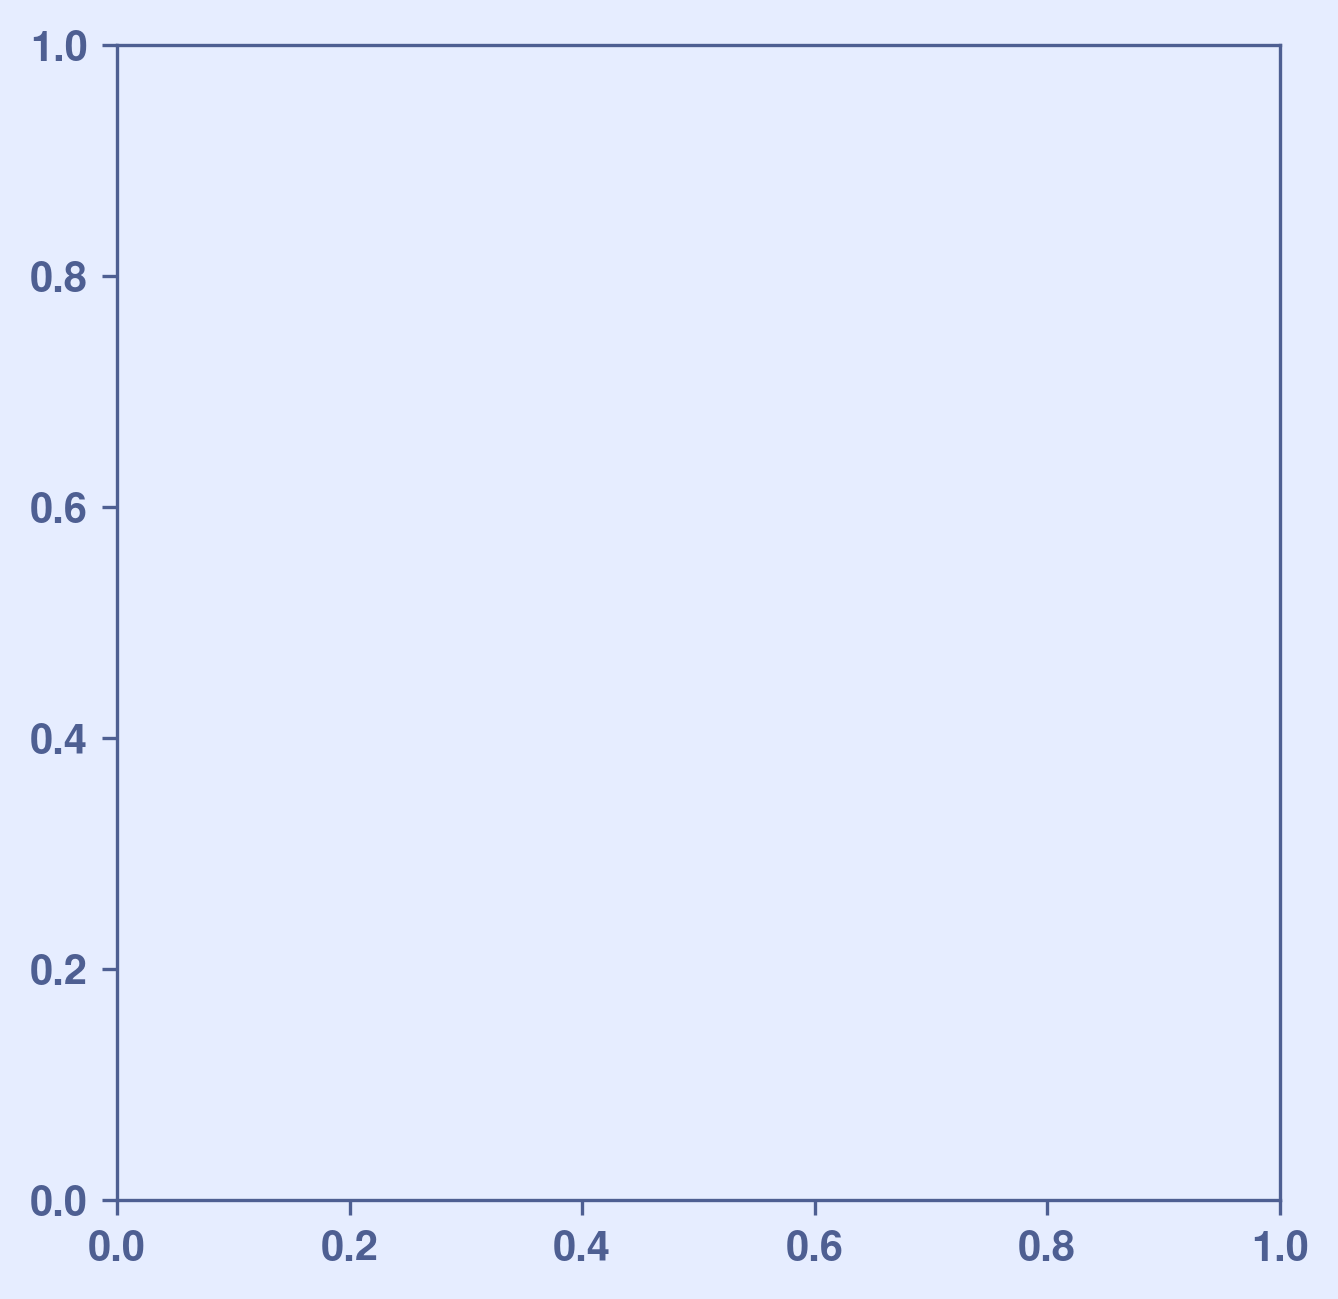

In [7]:
get_boxplot(df, 'latitude', "Latitude")
#...

/tmp/ipykernel_6898/2496686782.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mcm.get_cmap('Blues')
/tmp/ipykernel_6898/2496686782.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(
/tmp/ipykernel_6898/2496686782.py:9: UserWarning: The palette list has more values (144) than needed (64), which may not be intended.
  sns.barplot(


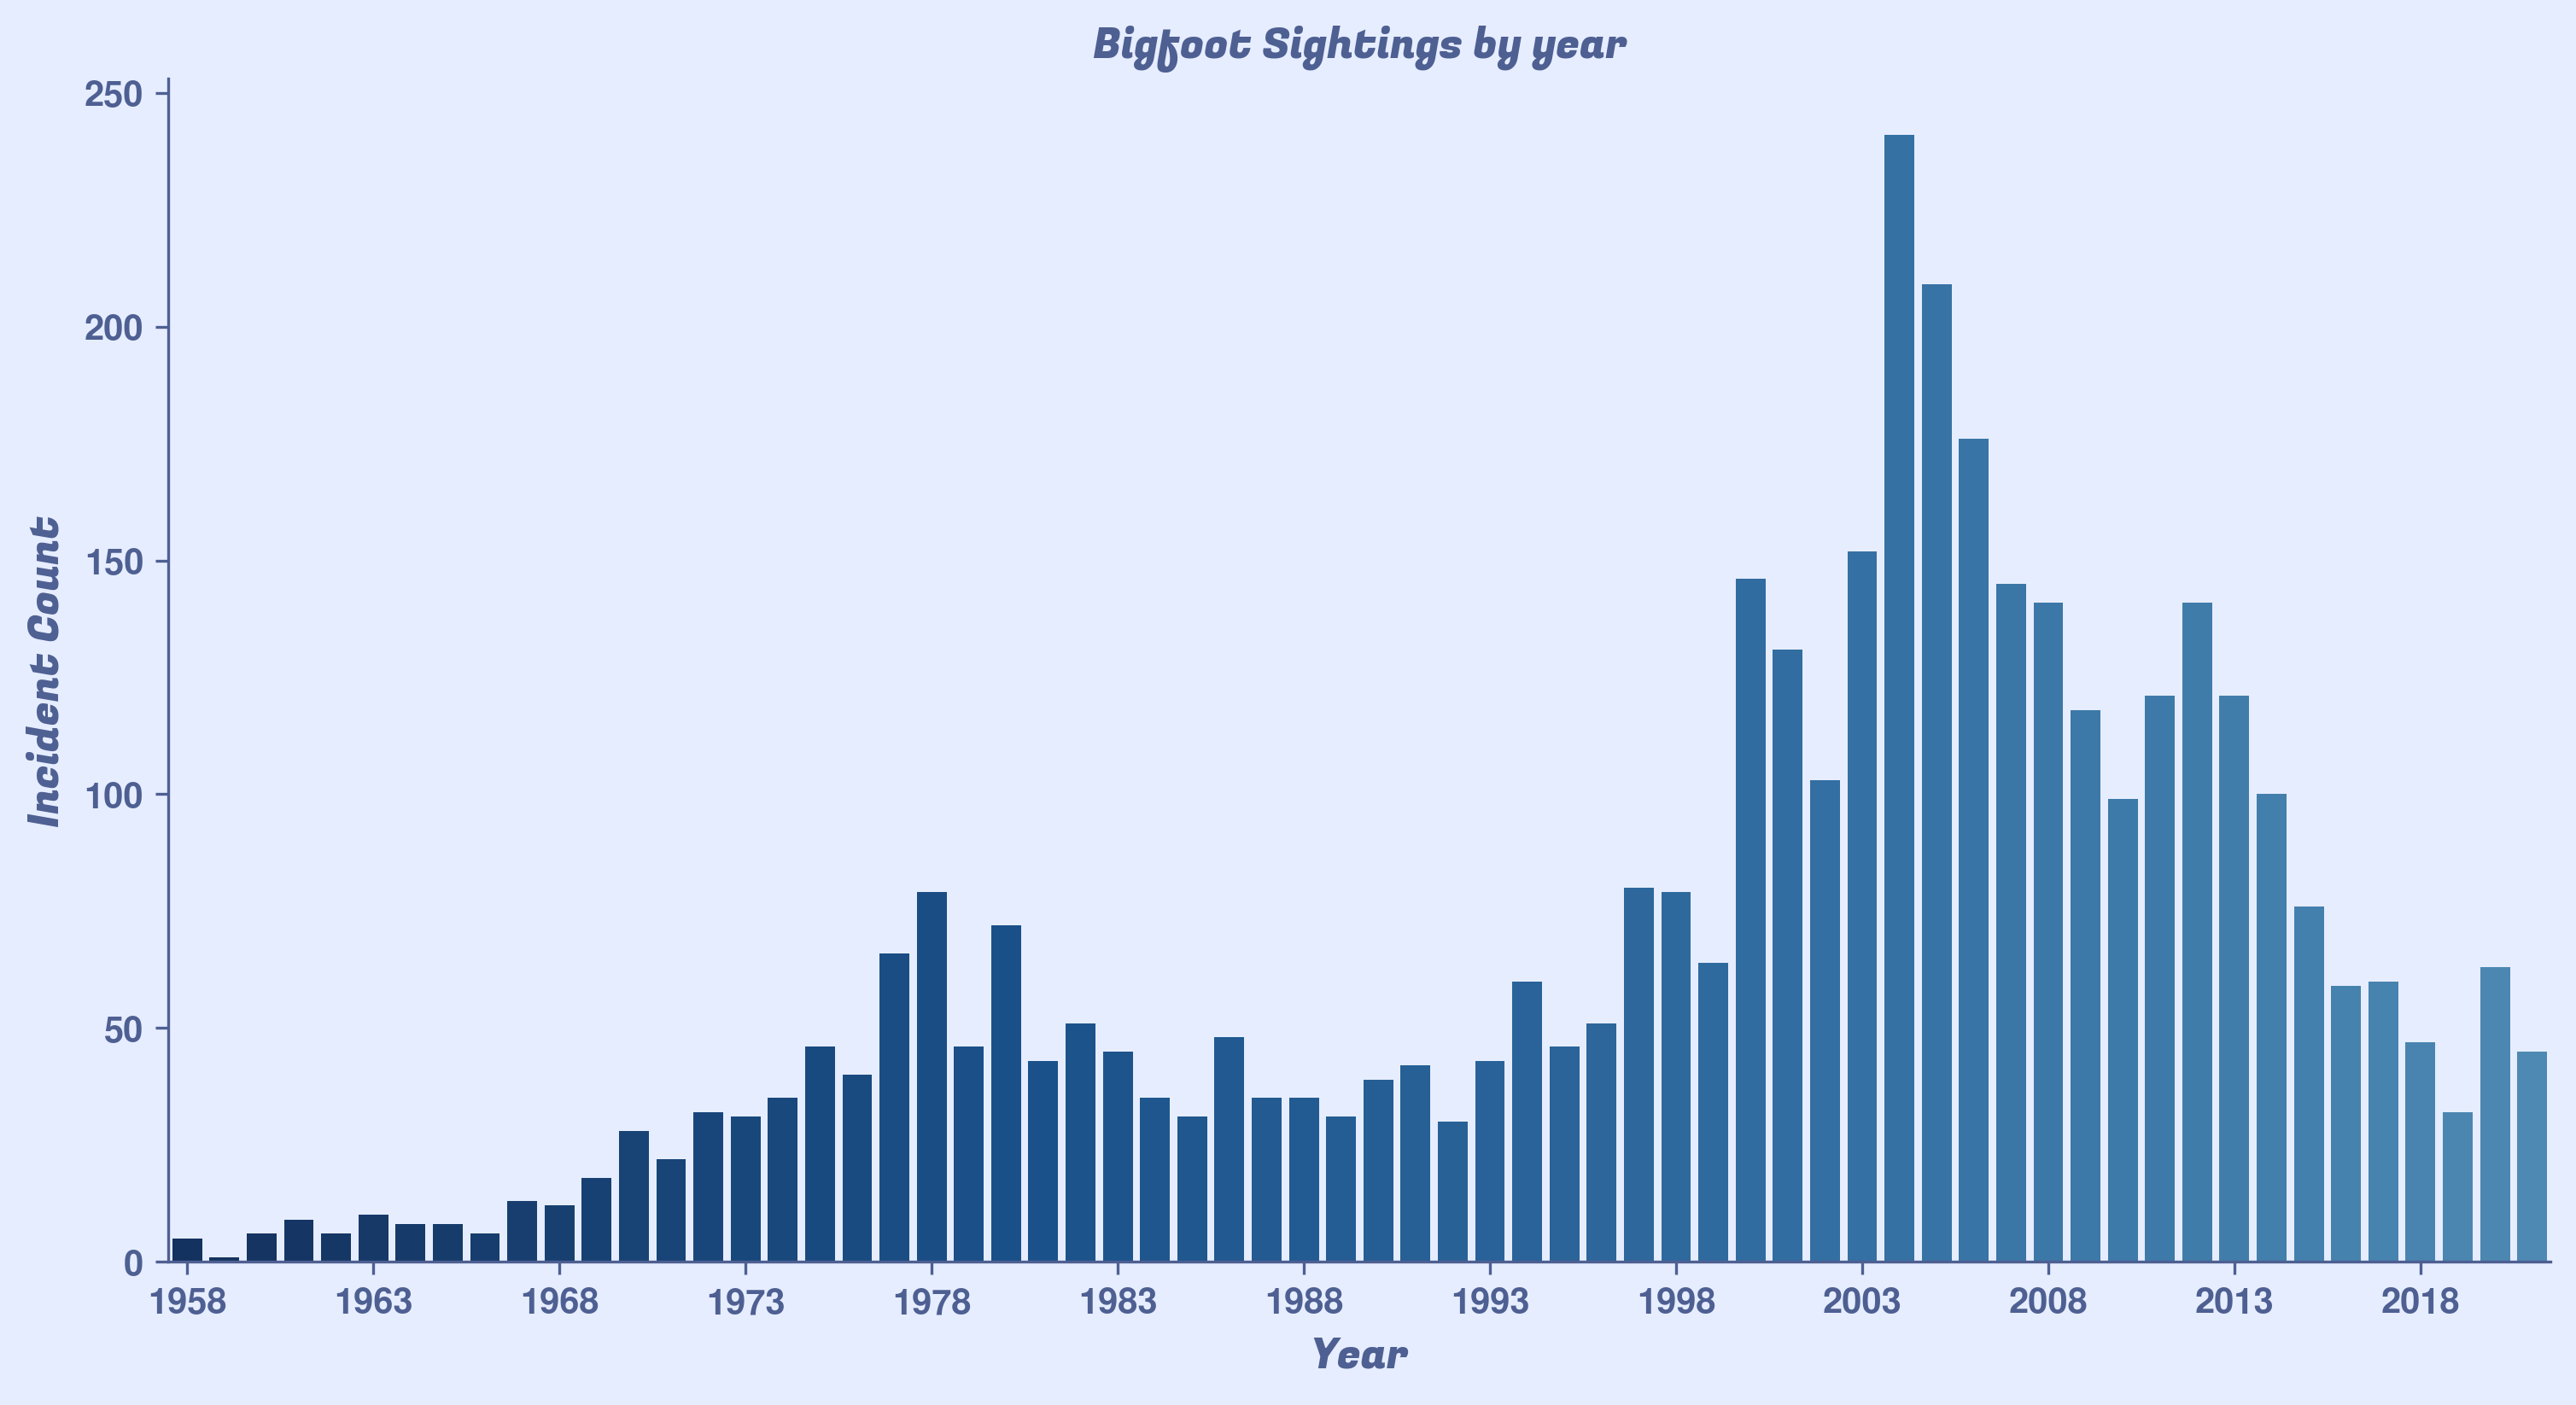

In [ ]:
ax = date_df['Year'].value_counts().sort_index()
cmap = mcm.get_cmap('Blues')
colors = cmap(np.linspace(0.2, 1, len(ax.values) + 80))[::-1]

fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('#e6edff')
plt.gca().set_facecolor('#e6edff')

sns.barplot(
  x = ax.index,
  y = ax.values,
  palette=colors,
  hue=ax.index,
  legend=False
)
plt.xlabel('Year', fontproperties=font_prop)
plt.ylabel('Incident Count', fontproperties=font_prop)
plt.title('Bigfoot Sightings by year', fontproperties=font_prop)
plt.xticks(
  ticks=np.arange(0, len(ax.index), 5),
  labels=ax.index[::5]
)

sns.despine()
plt.show()

/tmp/ipykernel_6898/1299648007.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mcm.get_cmap('viridis', 40)


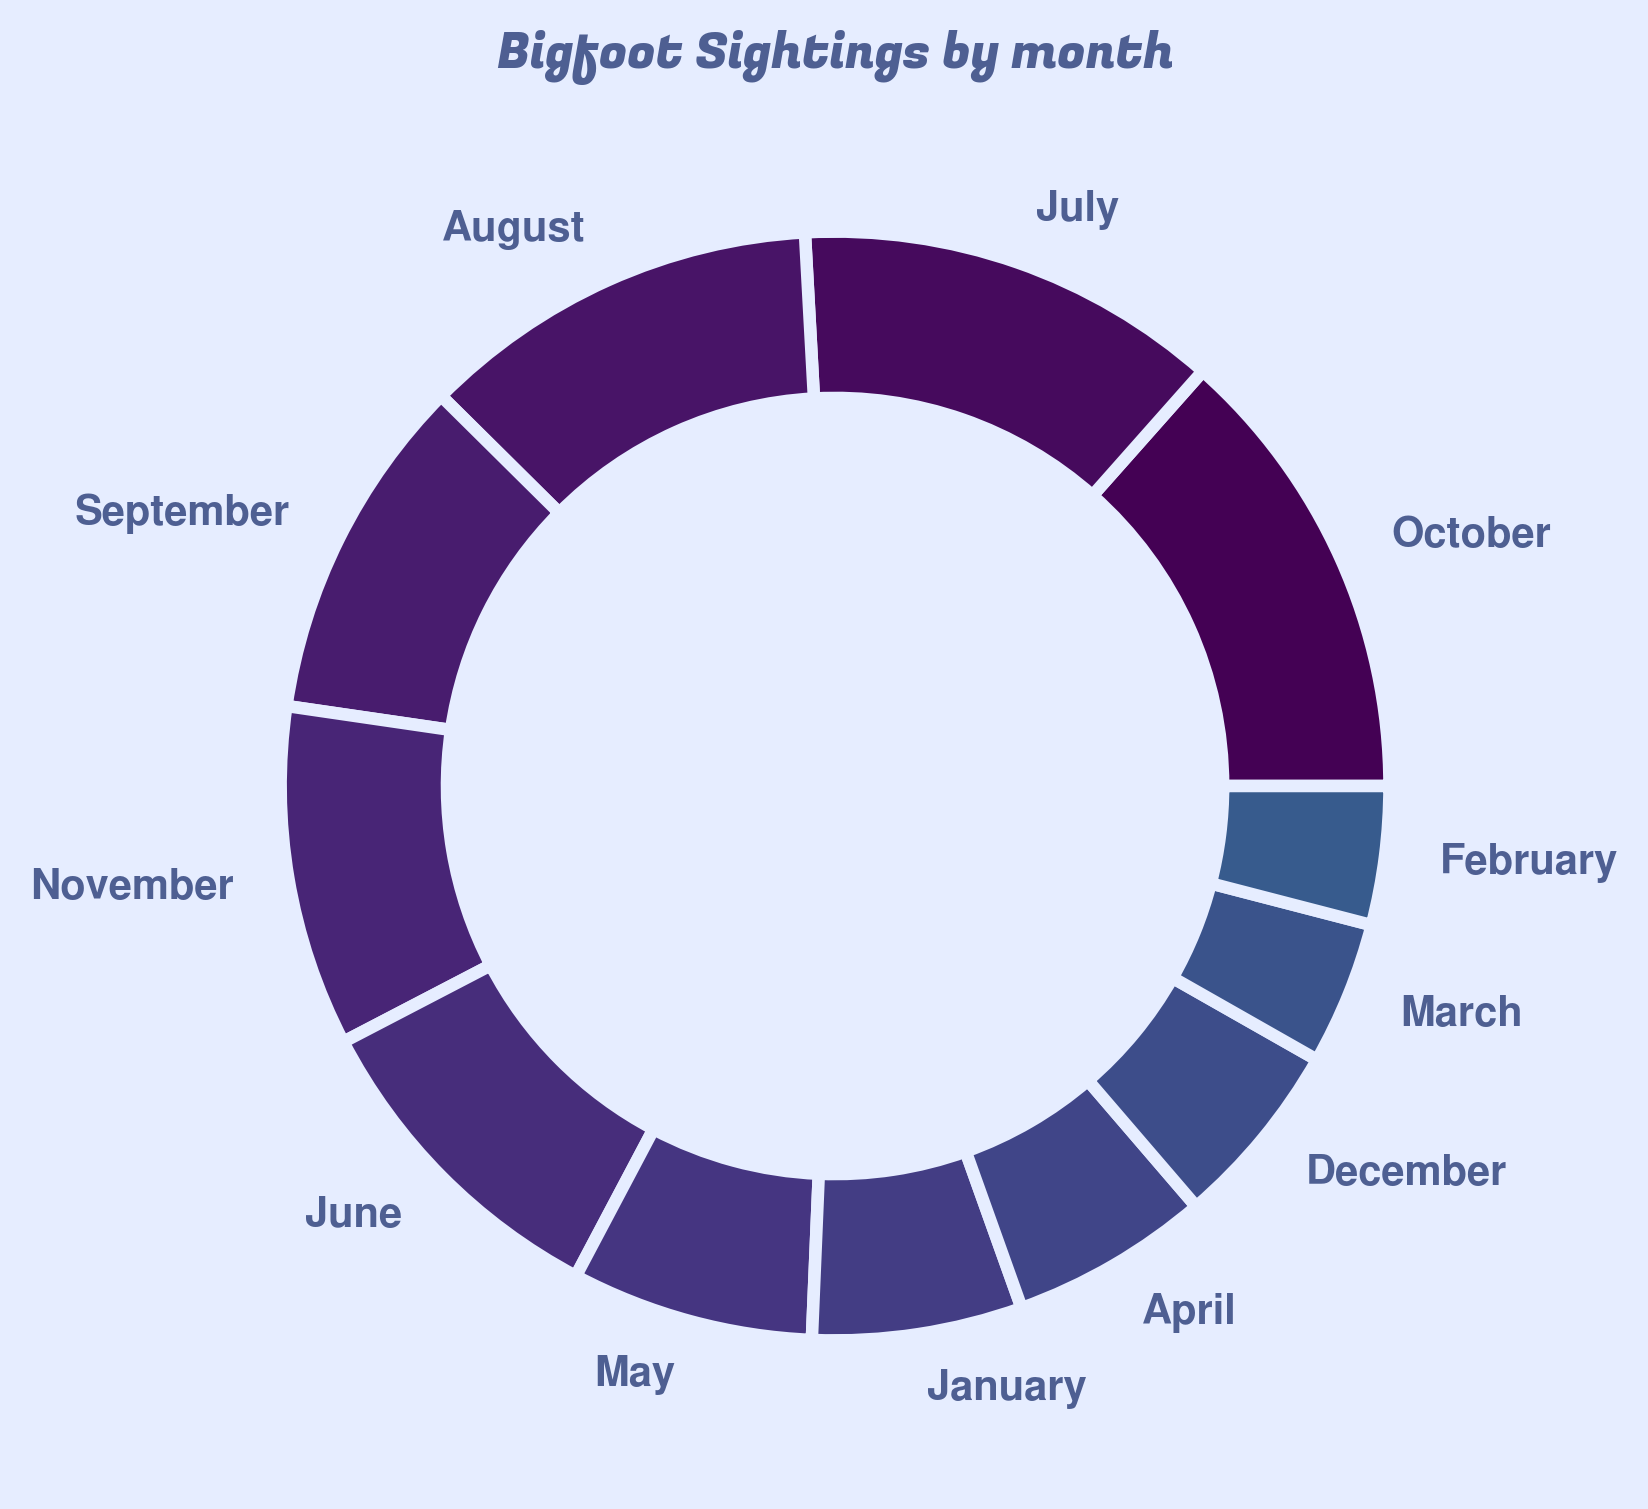

In [ ]:
month_counts = date_df['Month'].value_counts()
colors = mcm.get_cmap('viridis', 40)

fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('#e6edff')
plt.gca().set_facecolor('#e6edff')

plt.pie(
  month_counts,
  labels = month_counts.index,
  colors=colors(range(12)),
  wedgeprops={
    'edgecolor': '#e6edff',
    'width': 0.3,
    'linewidth': 3
  }
)
plt.title('Bigfoot Sightings by month', fontproperties=font_prop)
plt.show()

/tmp/ipykernel_6898/3628743804.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mcm.get_cmap('Blues')
/tmp/ipykernel_6898/3628743804.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.histplot(df, x=param, hue=param, palette=colors, legend=False, linewidth=0)
/tmp/ipykernel_6898/3628743804.py:20: UserWarning: The palette list has more values (70) than needed (49), which may not be intended.
  sns.histplot(df, x=param, hue=param, palette=colors, legend=False, linewidth=0)
/tmp/ipykernel_6898/3628743804.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(o

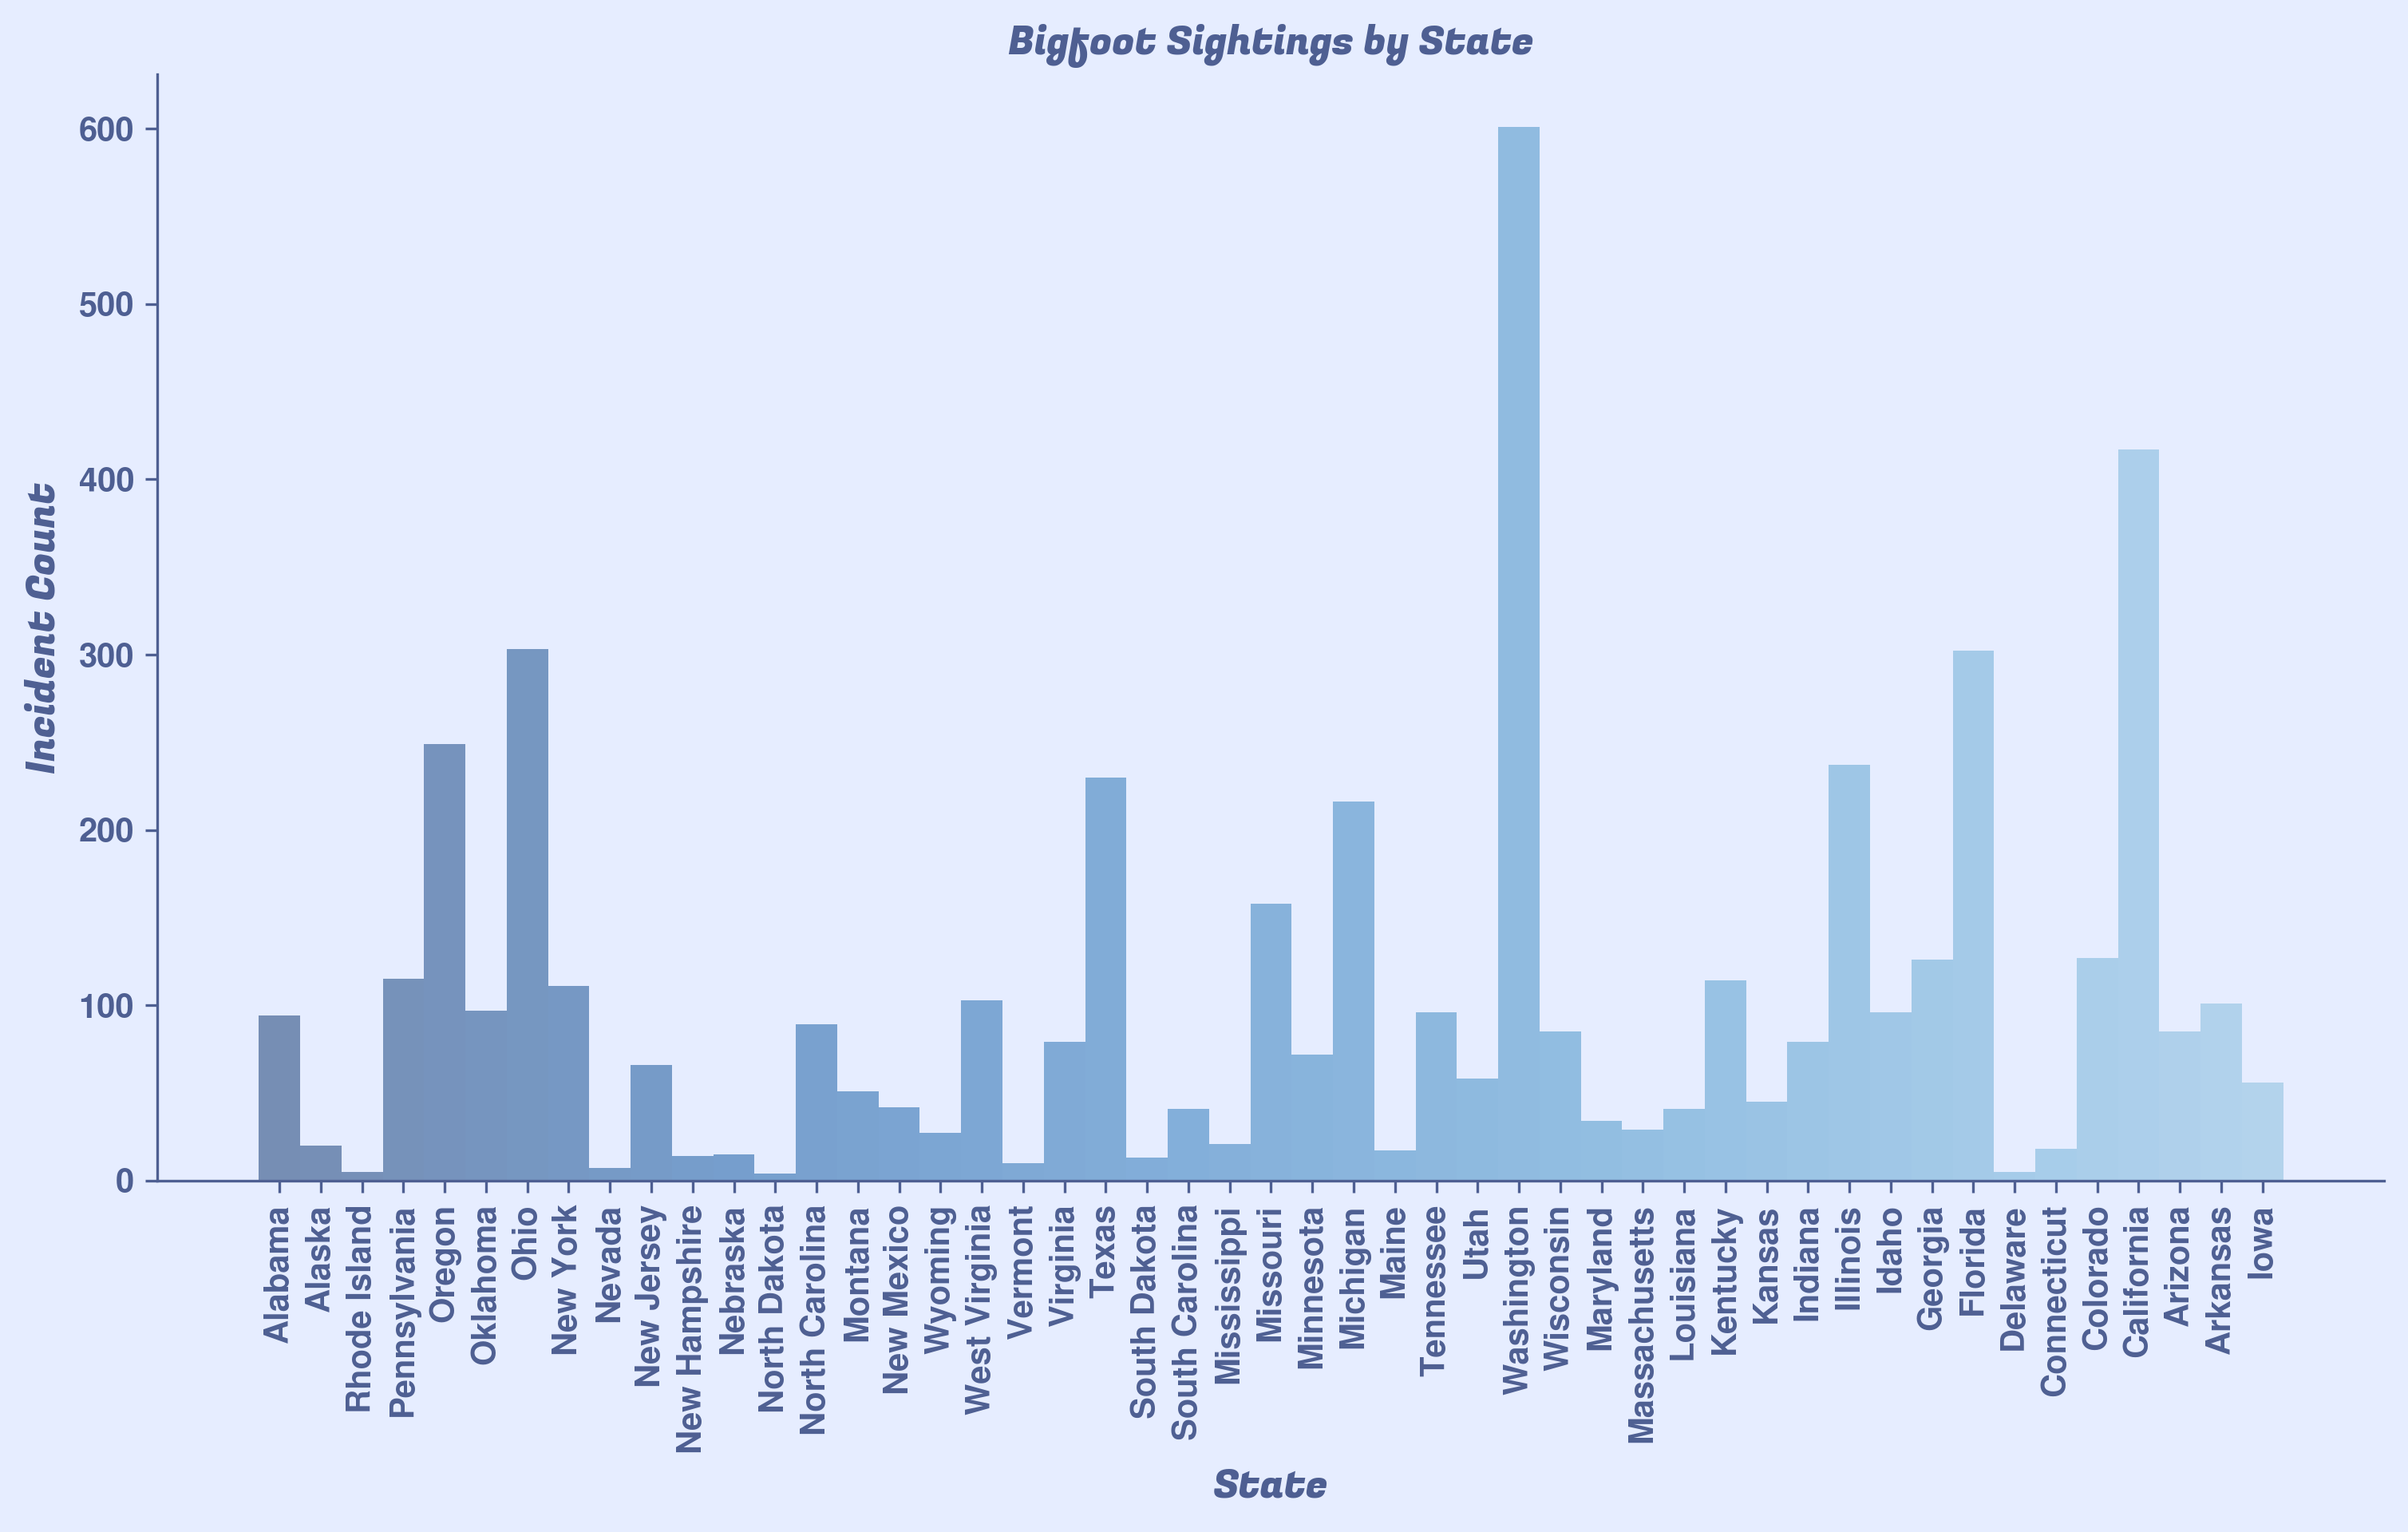

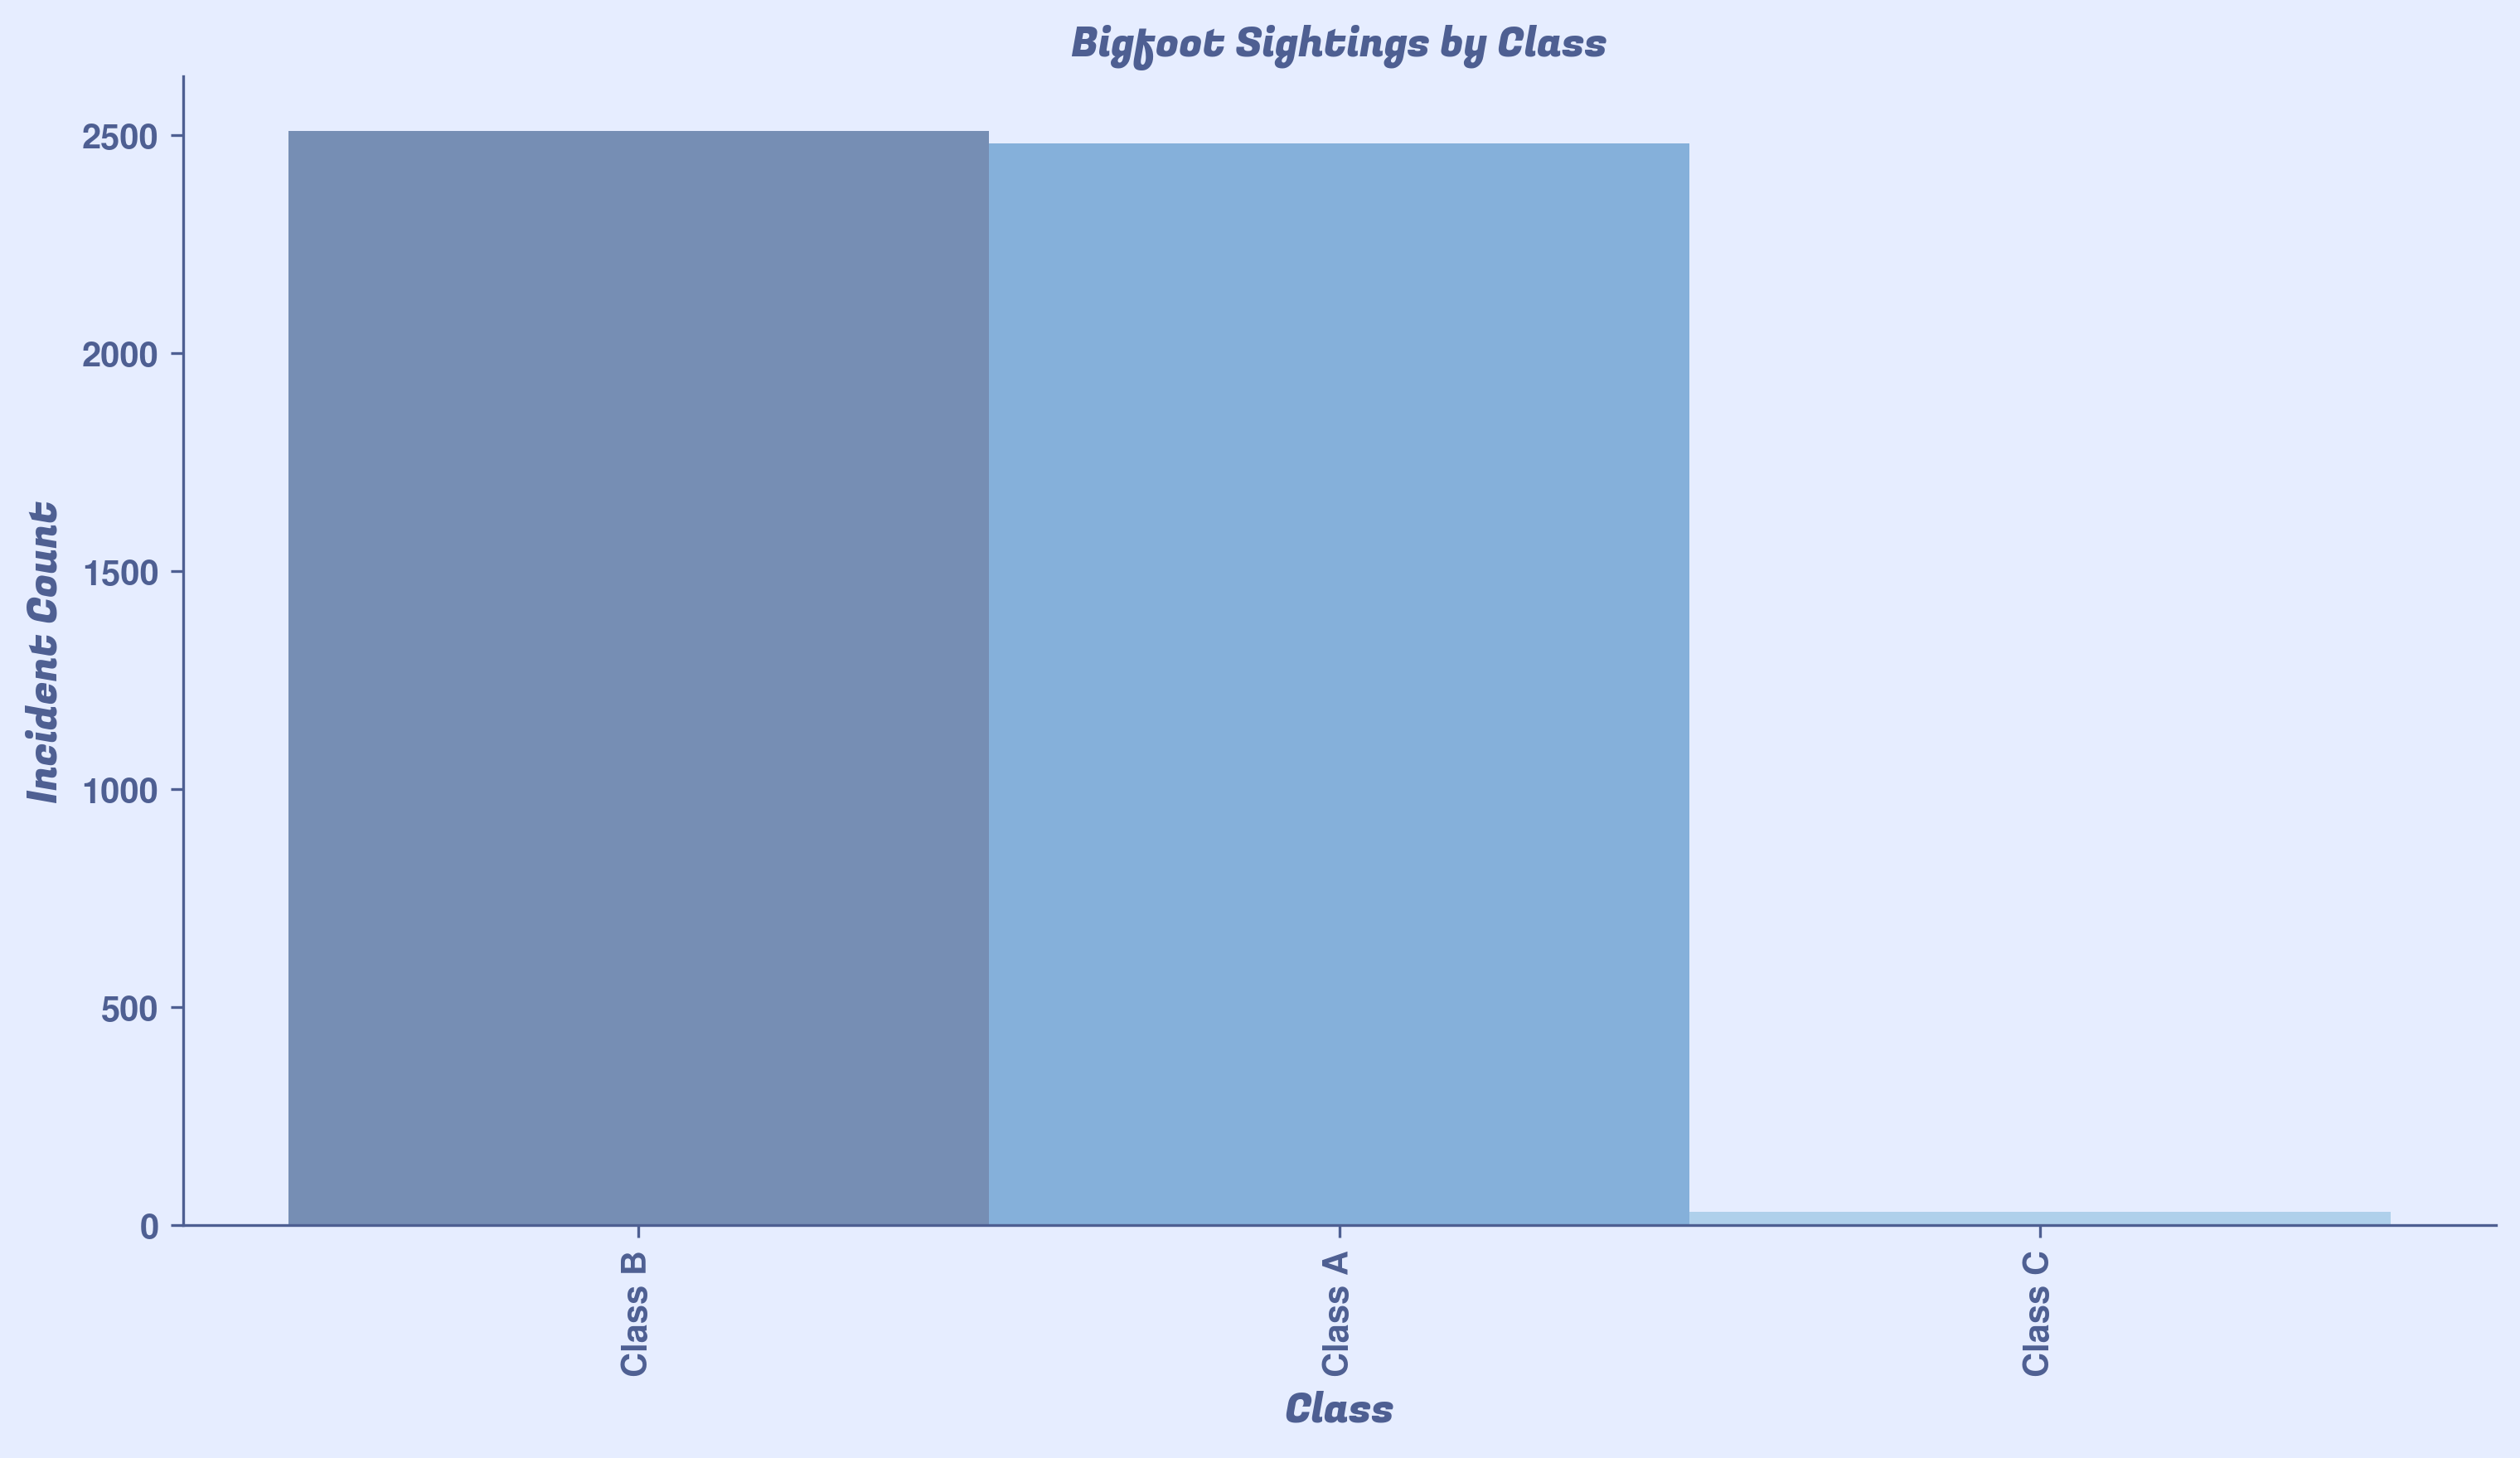

In [ ]:
params = {
  "state": {
    "name": "State",
    "colors": 70
  },
  "classification": {
    "name": "Class",
    "colors": 4
  }
}

for param in ["state", "classification"]:
  cmap = mcm.get_cmap('Blues')
  colors = cmap(np.linspace(0.2, 1, params[param]['colors']))[::-1]

  fig = plt.figure(figsize=(12, 6))
  fig.set_facecolor('#e6edff')
  plt.gca().set_facecolor('#e6edff')

  sns.histplot(df, x=param, hue=param, palette=colors, legend=False, linewidth=0)
  plt.xticks(rotation=90) 
  plt.xlabel(params[param]["name"], fontproperties=font_prop)
  plt.ylabel('Incident Count', fontproperties=font_prop)
  plt.title('Bigfoot Sightings by ' + params[param]["name"], fontproperties=font_prop)
  sns.despine()
plt.show()

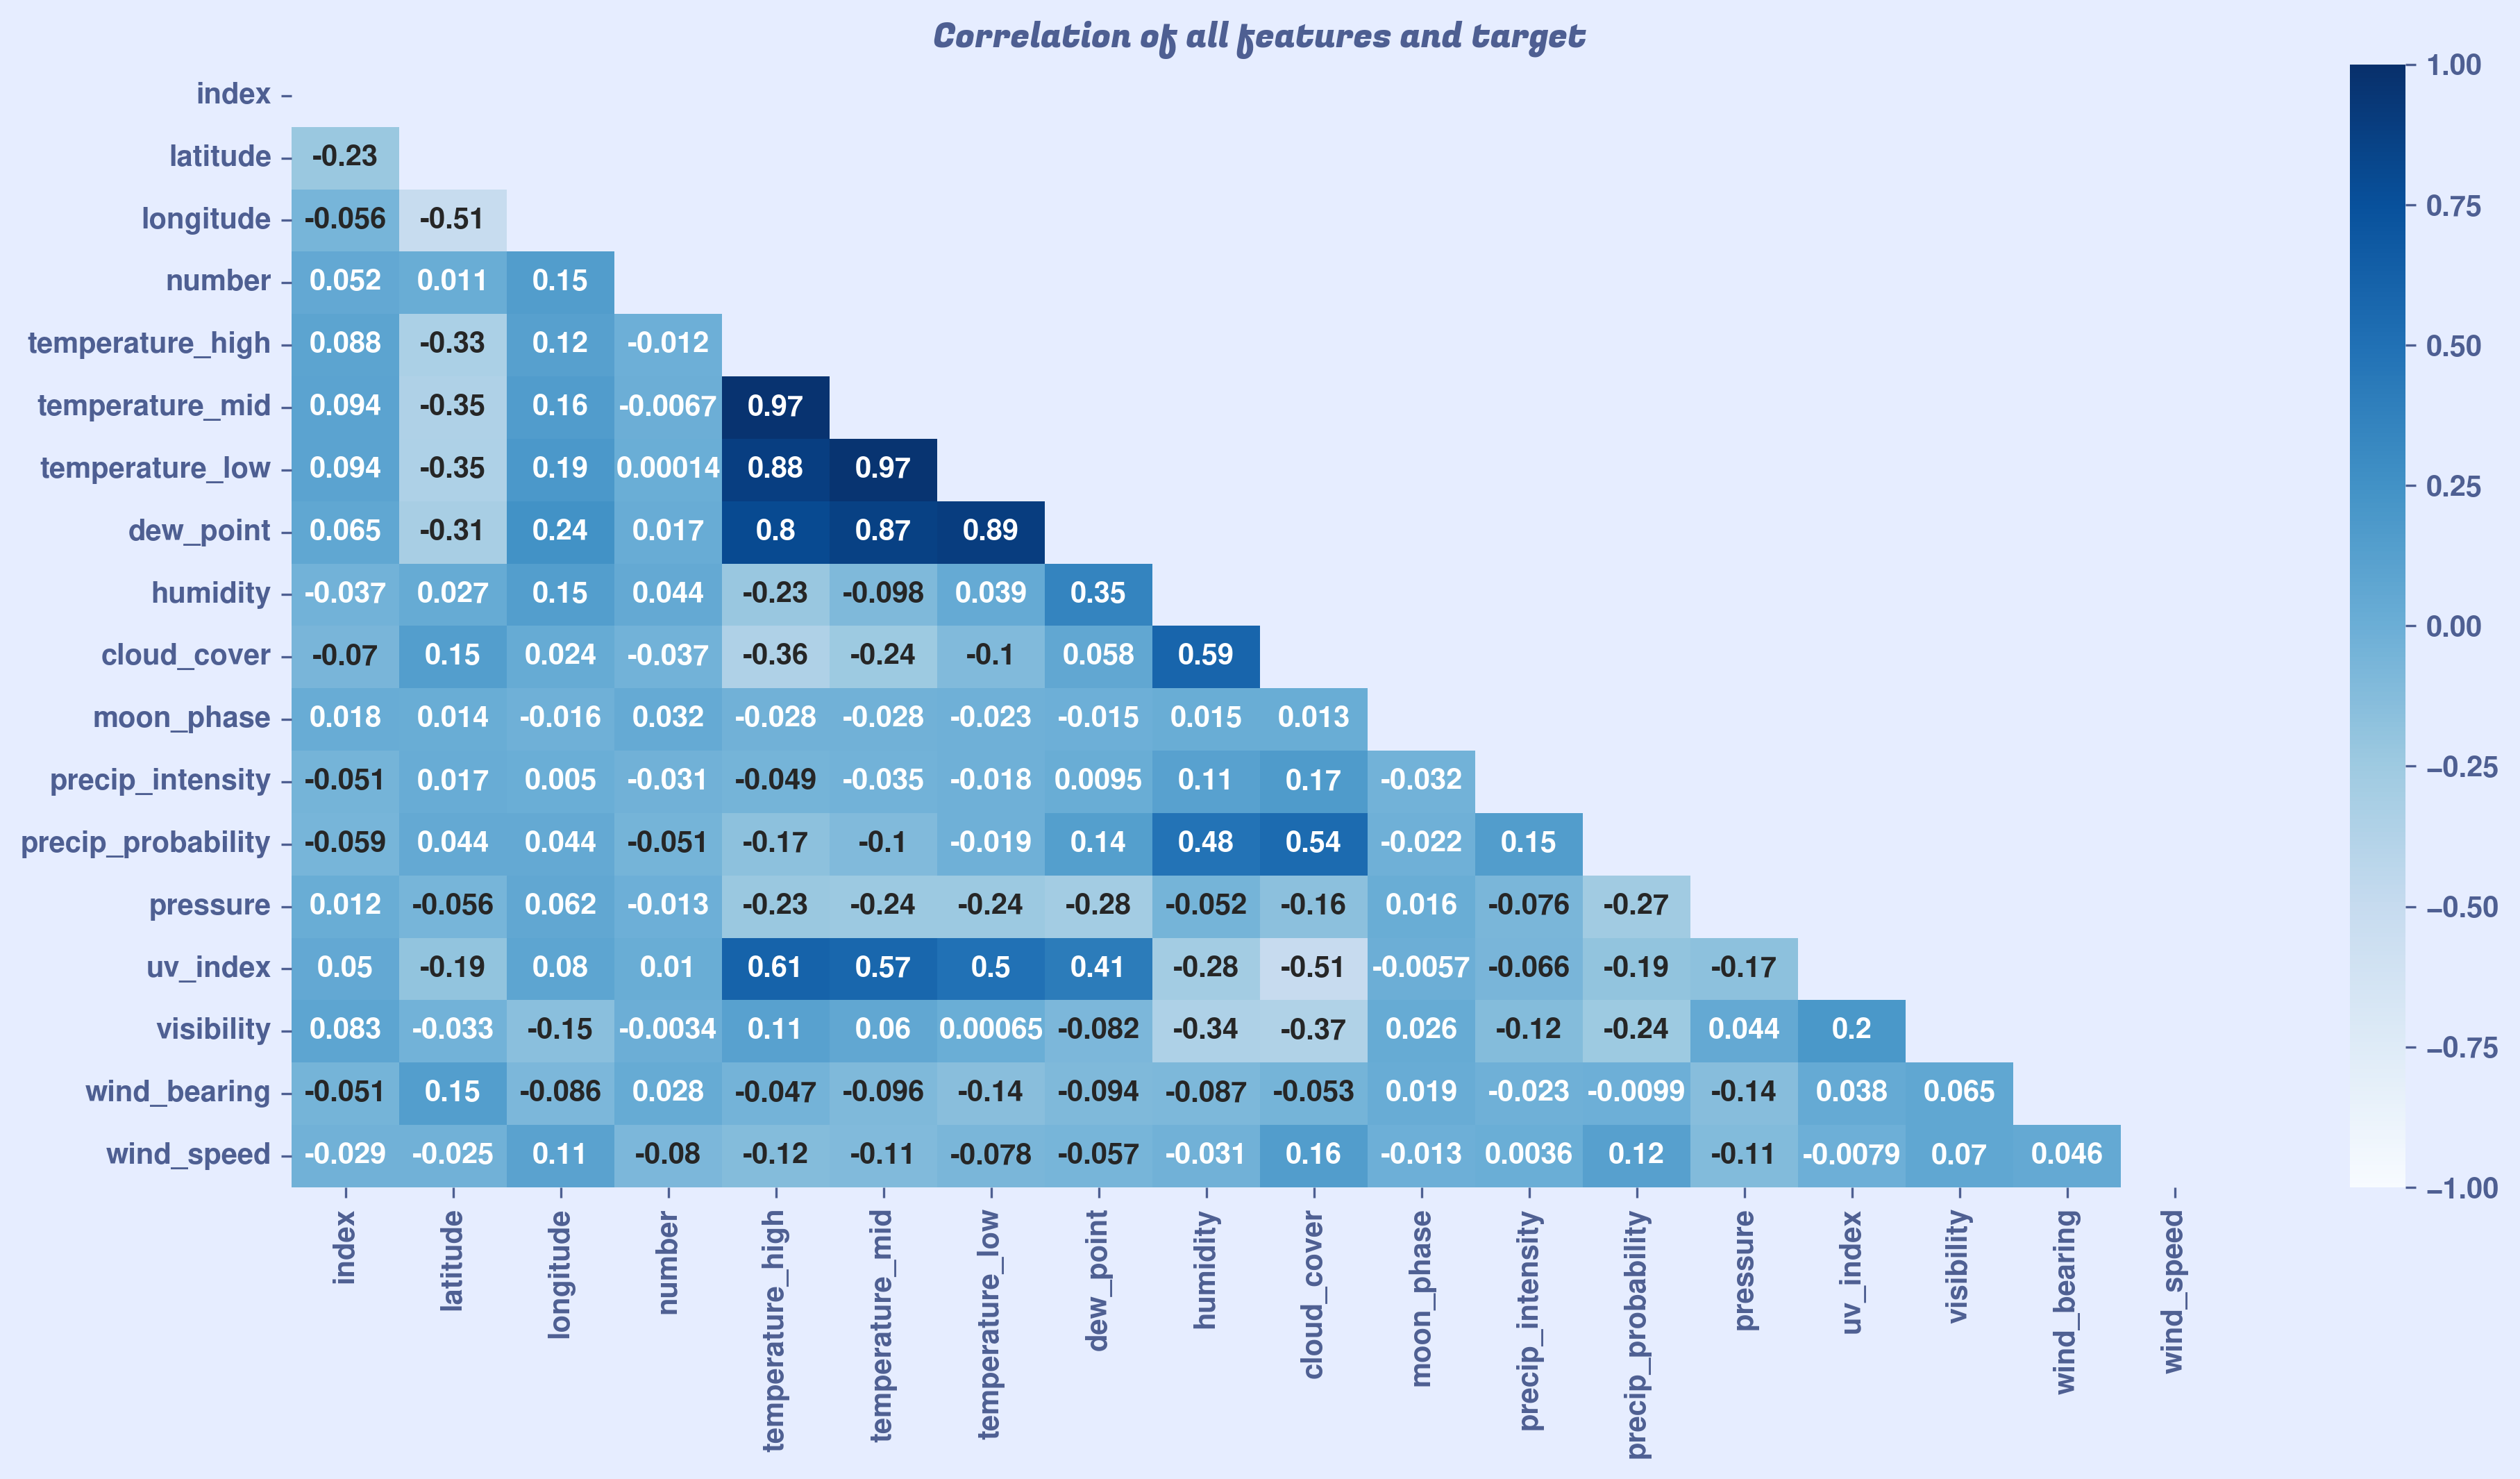

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.set_facecolor('#e6edff')
plt.gca().set_facecolor('#e6edff')

corr = df.corr(numeric_only = True)
upper_triangle = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,vmin = -1, vmax = 1, cmap = "Blues", annot = True, mask = upper_triangle)
plt.title("Correlation of all features and target", fontproperties=font_prop)
plt.show()

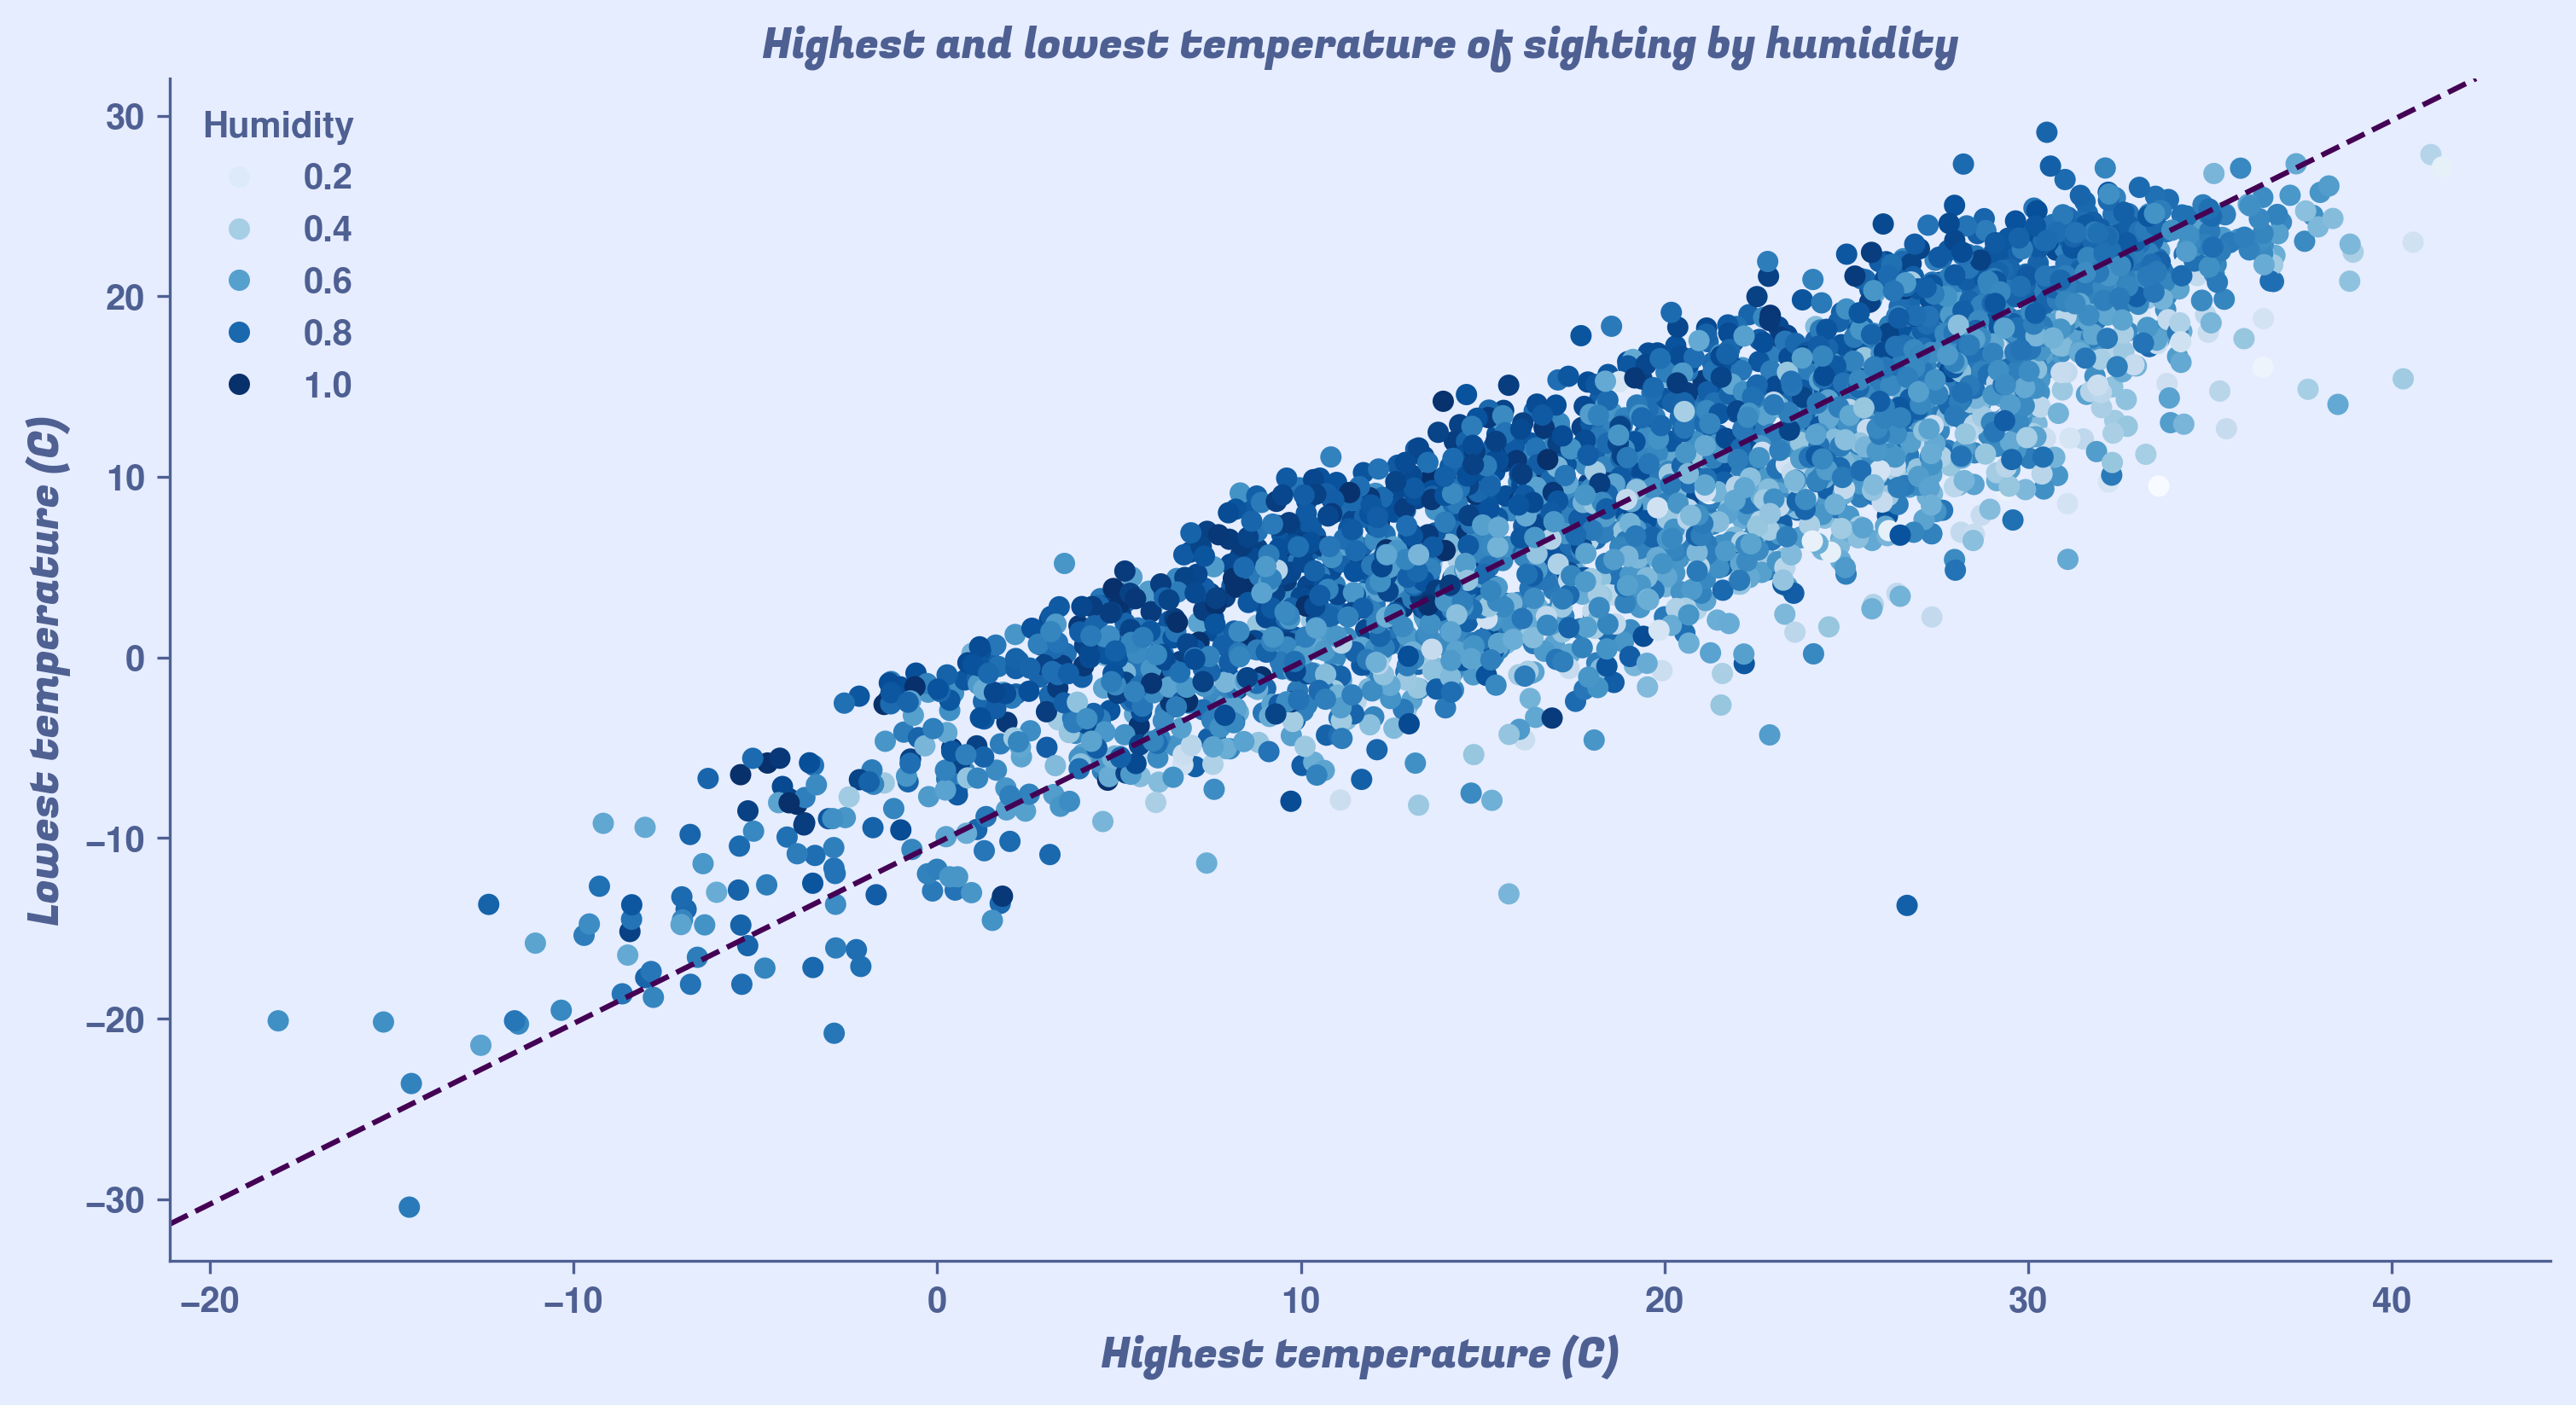

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('#e6edff')
plt.gca().set_facecolor('#e6edff')

sns.scatterplot(
  df,
  x="temperature_high",
  y="temperature_low",
  hue="humidity",
  palette="Blues",
  linewidth=0,
)
plt.title("Highest and lowest temperature of sighting by humidity", fontproperties=font_prop)
plt.xlabel("Highest temperature (C)", fontproperties=font_prop)
plt.ylabel("Lowest temperature (C)", fontproperties=font_prop)
sns.despine()
plt.legend(title="Humidity", loc='upper left', frameon=False)

plt.axline((df['temperature_high'].mean(), df['temperature_low'].mean()), slope=1, color='#440154', linestyle='--')
plt.show()

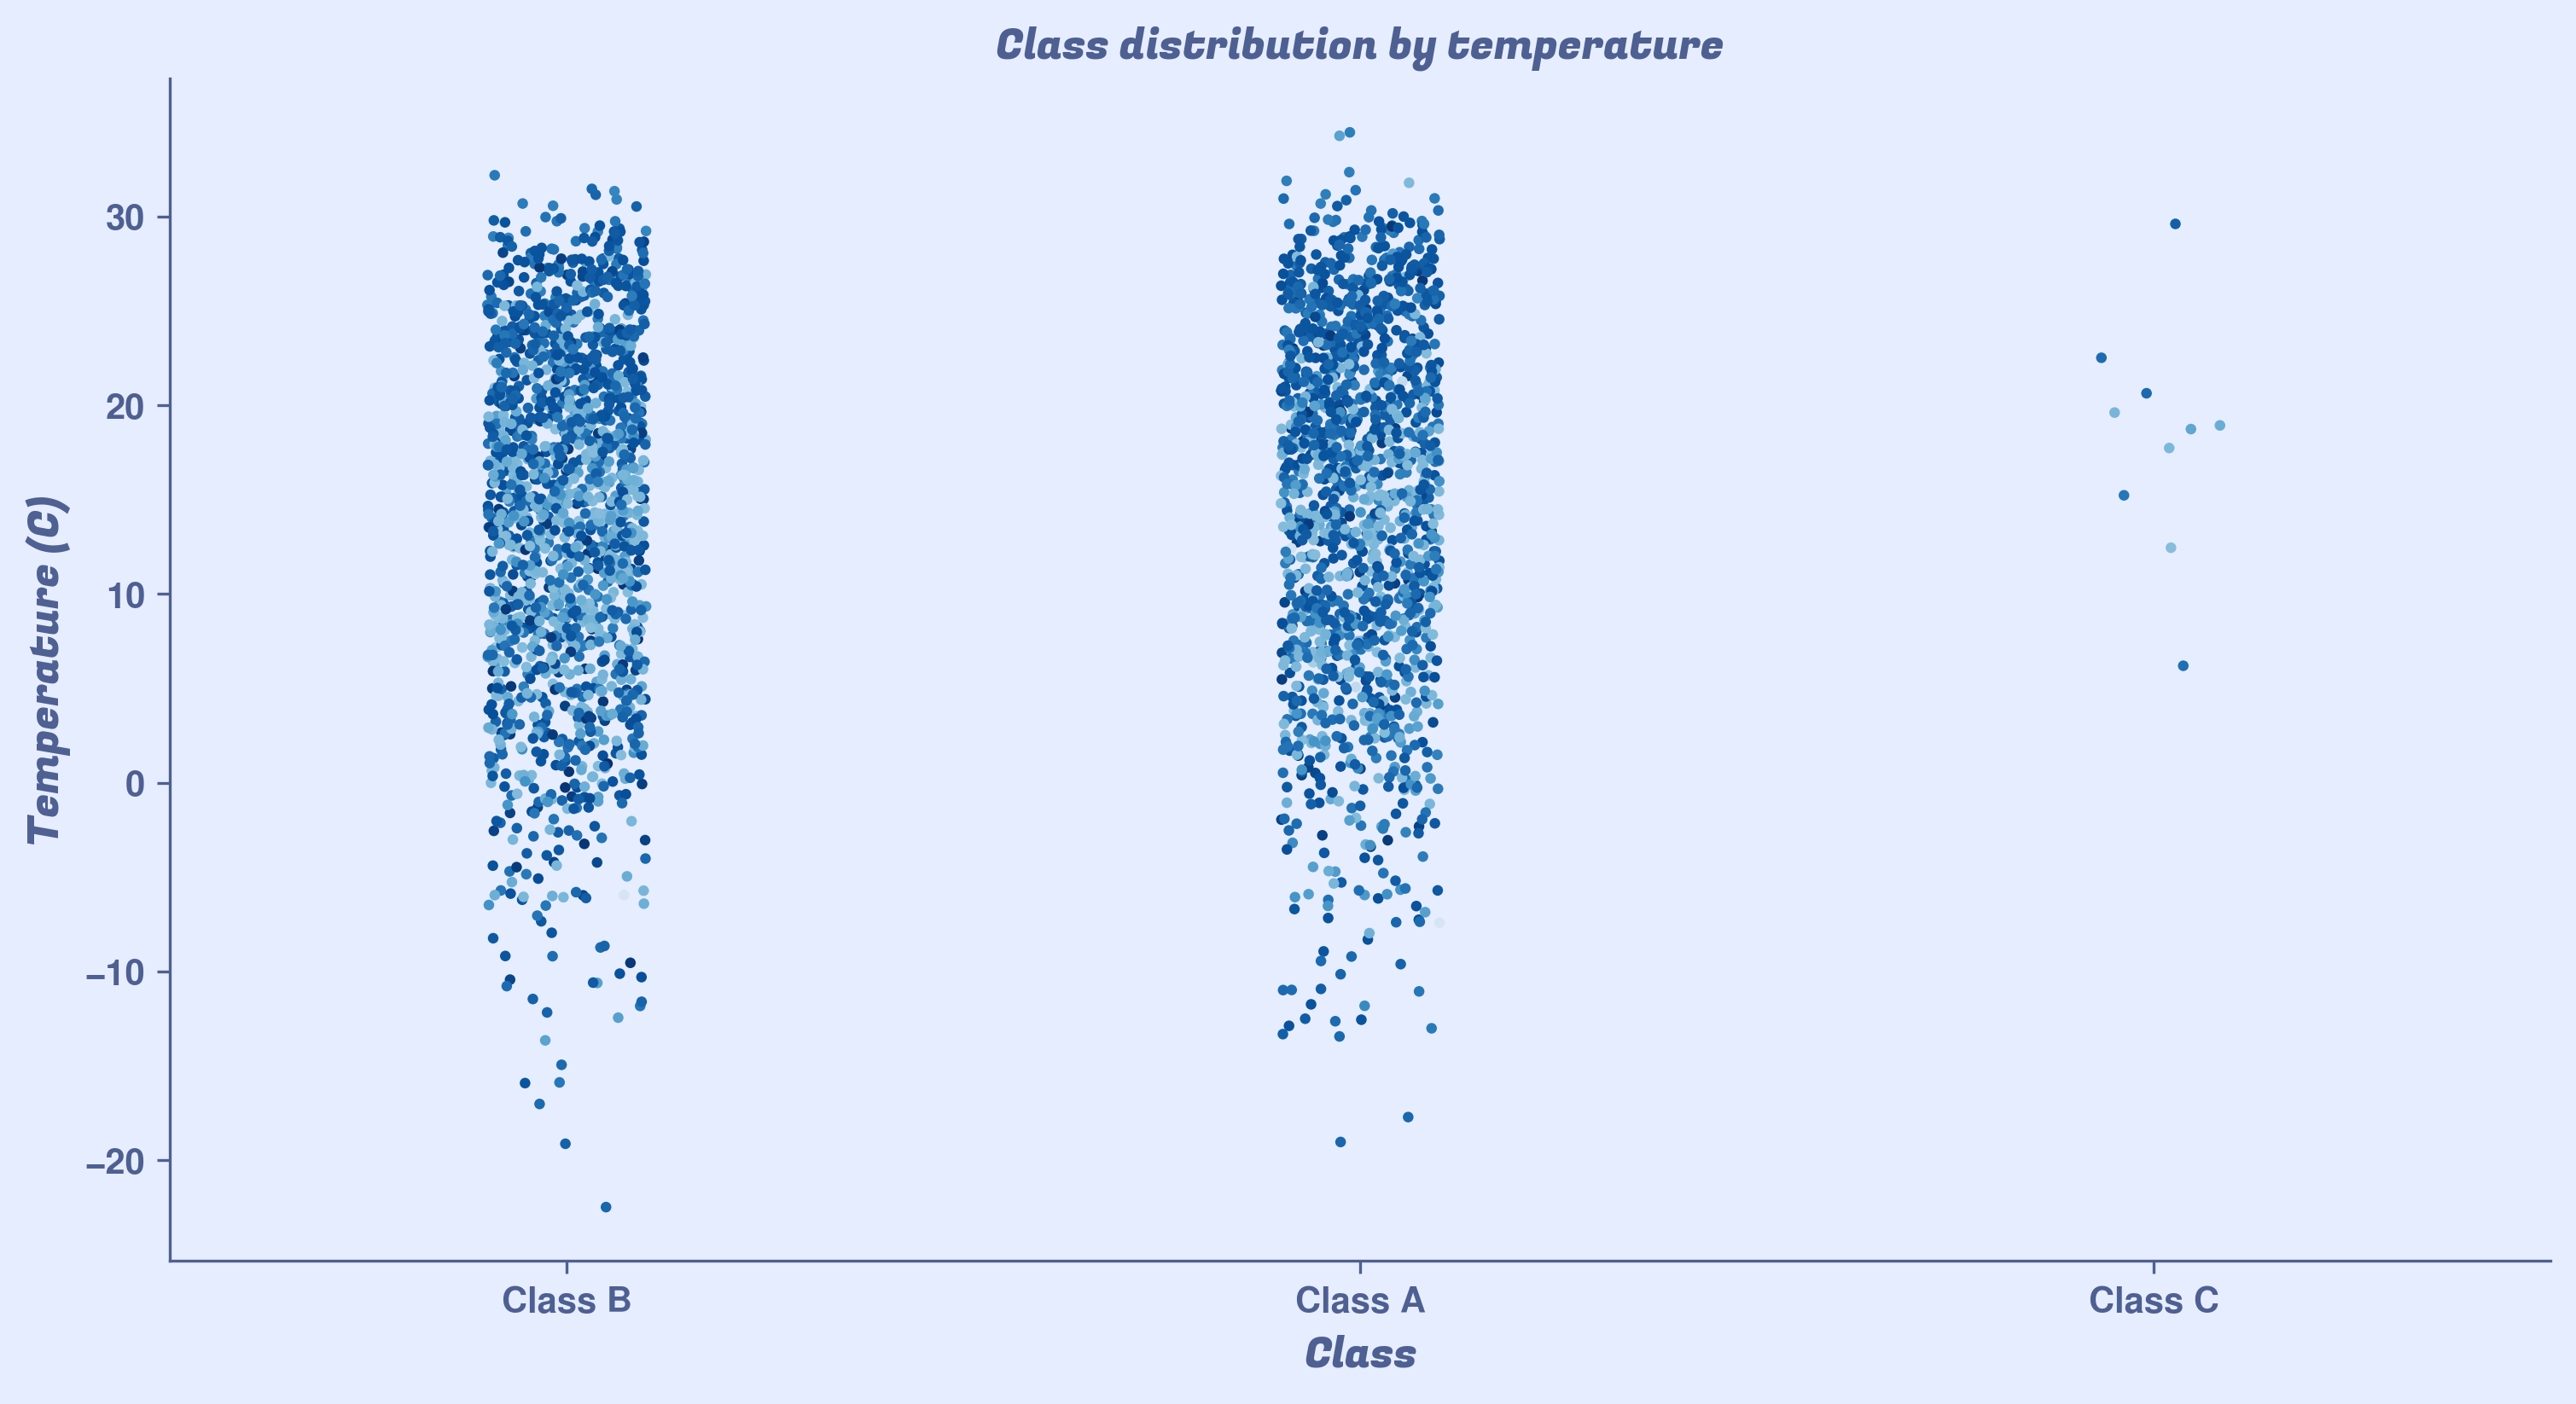

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('#e6edff')
plt.gca().set_facecolor('#e6edff')

sns.stripplot(
  df,
  x="classification",
  y="temperature_mid",
  palette="Blues",
  hue="longitude",
  size=3,>
  legend=False,
  linewidth=0,
)
plt.title("Class distribution by temperature", fontproperties=font_prop)
plt.xlabel("Class", fontproperties=font_prop)
plt.ylabel("Temperature (C)", fontproperties=font_prop)
sns.despine()

plt.show()

/tmp/ipykernel_6898/82067788.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mcm.get_cmap('Blues')
/tmp/ipykernel_6898/82067788.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.histplot(df, x="state", hue="season", palette=colors, multiple="stack", linewidth=0)


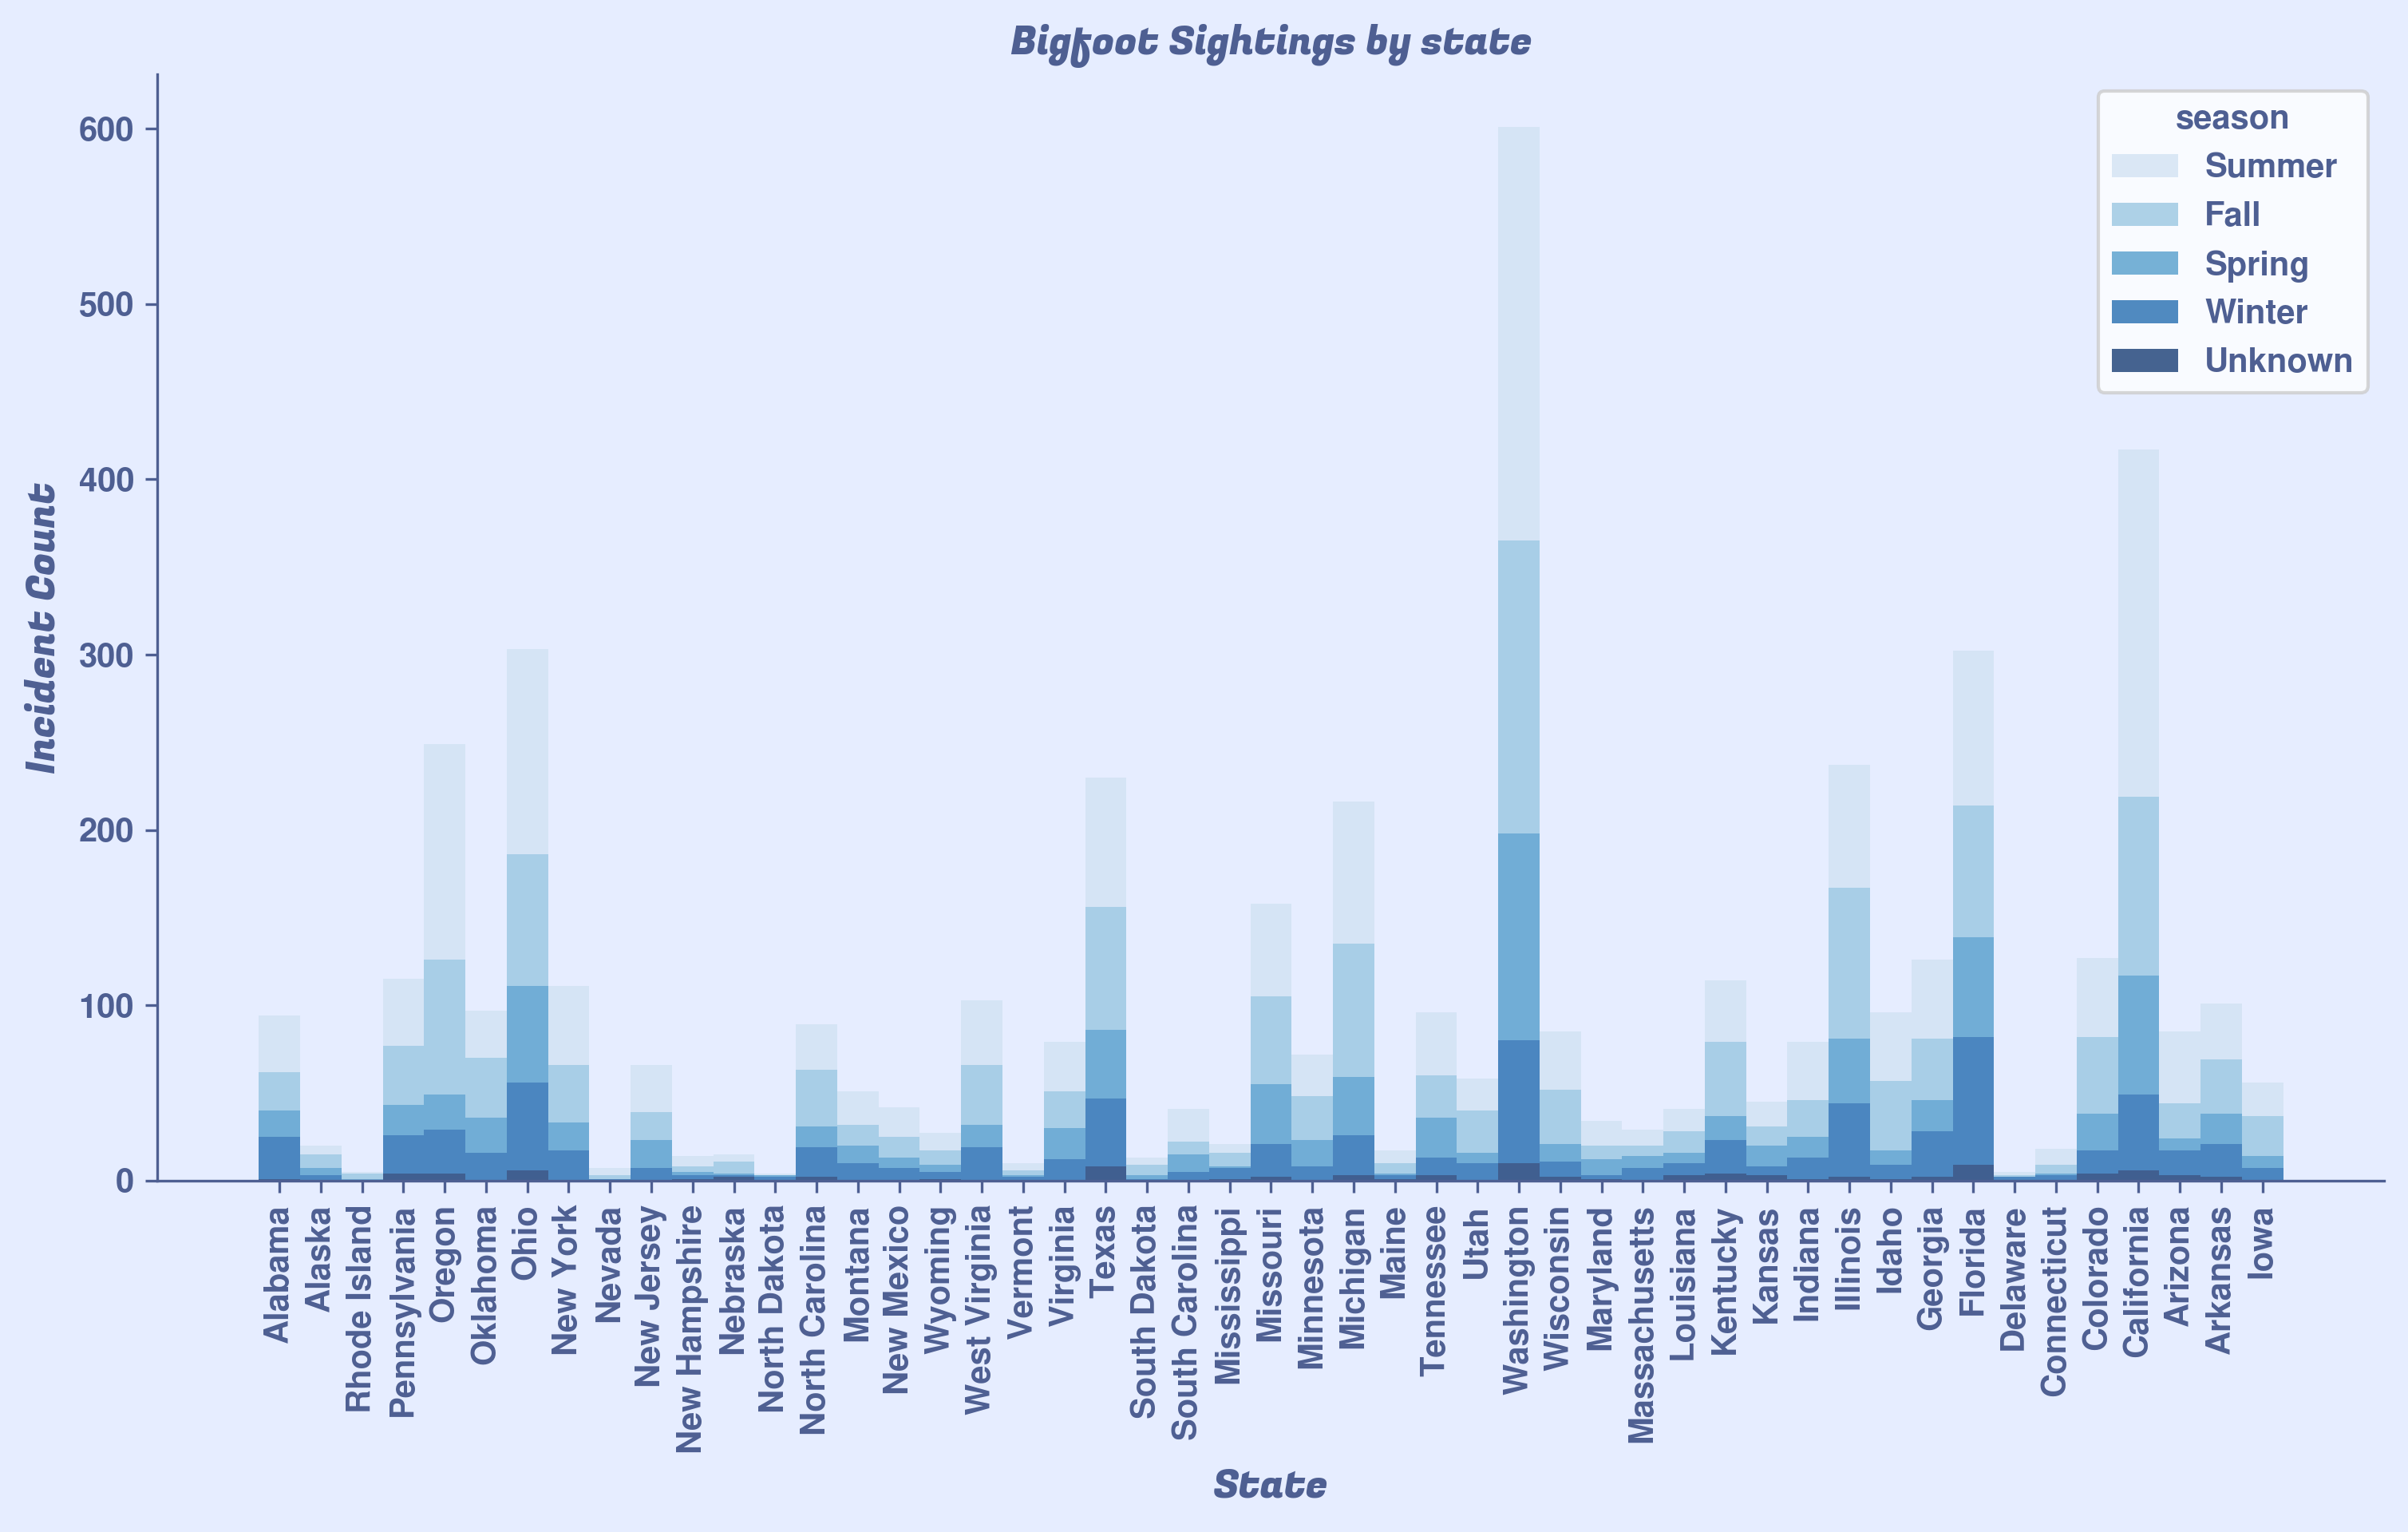

In [ ]:
cmap = mcm.get_cmap('Blues')
colors = cmap(np.linspace(0.2, 1, 5))
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('#e6edff')
plt.gca().set_facecolor('#e6edff')

sns.histplot(df, x="state", hue="season", palette=colors, multiple="stack", linewidth=0)

plt.xticks(rotation=90) 
plt.xlabel('State', fontproperties=font_prop)
plt.ylabel('Incident Count', fontproperties=font_prop)
plt.title('Bigfoot Sightings by state', fontproperties=font_prop)
sns.despine()
plt.show()